# Logistic Regression

## Table of Contents

1. [Introduction](#introduction)
2. [Import Libraries](#libraries)
3. [Logistic Function](#function)
4. [Logistic Regression](#regression)
5. [Using Scikit Learn](#sck)
6. [Real Life Data](#realdata)

## Introduction<a id='introduction'></a>



## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Logistic Function<a id='function'></a>

The logistic function, also called the sigmoid function was developed by statisticians to describe
properties of population growth in ecology. It’s an S-shaped curve that can take any real-valued number and
map it into a value between 0 and 1.

$$\frac{1}{1 + e^{-value}}$$

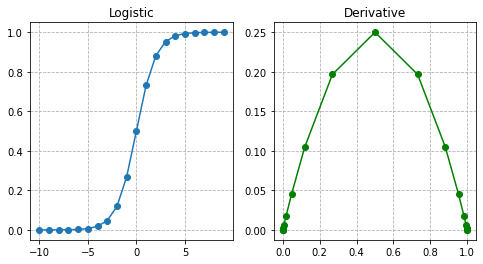

In [2]:
# Create data
x = []
for i in range(-10, 10):
  x.append(i)

df_logistic = pd.DataFrame(columns=['x']) # Convert the data into dataframe
df_logistic['x'] = x
df_logistic['Logistic'] = 1 / (1 + np.exp(-df_logistic['x'])) # Calculate the logistic of the data values using aboev function
df_logistic['Derivative'] = df_logistic['Logistic'] * (1 - df_logistic['Logistic']) # Calculate the derivative of the logistic values

# Plot the Logistic values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(df_logistic['x'], df_logistic['Logistic'], 'o-')
plt.grid(linestyle = '--')
plt.title('Logistic', fontsize=12)

# Plot the Derivative values
plt.subplot(1, 2, 2)
plt.plot(df_logistic['Logistic'], df_logistic['Derivative'], 'go-')
plt.grid(linestyle = '--')
plt.title('Derivative', fontsize=12)

plt.show()

## Logistic Regression<a id="regression"></a>

In regression analysis, logistic regression[[1]](https://jamanetwork.com/journals/jama/article-abstract/2540383) (or logit regression) is estimating the parameters of a logistic model (the coefficients in the linear combination). Formally, in binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value)[[2]](https://en.wikipedia.org/wiki/Logistic_regression). 

Logistic regression uses an equation as the representation, very much like linear regression.

$$\hat{y}=\frac{e^{b_0+b_1×x}}{1 + e^{b_0+b_1×x}}$$

This function provides a probability between 0 and 1 which has to be mapped to binary values (0 or 1) later. That's why this function can be presented as per below.

$$P(x)=\frac{e^{b_0+b_1×x}}{1 + e^{b_0+b_1×x}} ==> ln(\frac{P(x)}{1 - P(x)}) = b_0+b_1×x$$

To map the probability to binary we use:
$$\hat{y} = 0 \text{  IF  } p(x) < 0.5$$
$$\hat{y} = 1 \text{  IF  } p(x) \geq 0.5$$

### Load Sample Data


In [3]:
x1 = [2.7810836, 1.465489372, 3.396561688, 1.38807019, 3.06407232, 7.627531214, 5.332441248, 6.922596716, 8.675418651, 7.673756466]
x2 = [2.550537003, 2.362125076, 4.400293529, 1.850220317, 3.005305973, 2.759262235, 2.088626775, 1.77106367, -0.242068655, 3.508563011]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df = pd.DataFrame(columns=['x1', 'x2', 'y'])
df['x1'] = x1
df['x2'] = x2
df['y'] = y

df

,x1,x2,y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


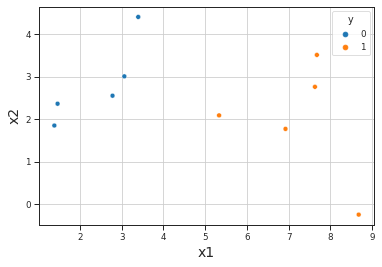

In [51]:
sb.set_style("ticks",{'axes.grid' : True})
sb.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":14})
sb.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.show()

### Training the Model Manually using Stochastic Gradient Descent

In [22]:
lr = 0.3 # Learning Rate
bias = 1 # Bias
iter = 10 # Number of iterations
b0 = 0 # Bias
b1 = 0 # First weight
b2 = 0 # Second weight

rmse = [] # Root mean square error at the end of each iteration
accuracy = [] # Accuracy at the end of each iteration

# Create dataframe to collect the all data generated in each iteration
df_predictions = pd.DataFrame(columns=['x1', 'x2', 'y', 'Predictions', 'Sharp Predictions', 'Squared Error', 'Error'])

for j in range(0, iter):
  df_lr = df.copy()
  predictions = [] # Predictions
  sharp_pred = [] # Predictions that are mapped to binary format 
  sq_error = []
  error = []
  # Loop in the dataset
  for i in range(0, len(df_lr)):
    # Predict the y using the current bias and weights
    y_hat = 1 / (1 + np.exp(-1 * ((bias * b0) + (df_lr.loc[i, 'x1'] * b1) + (df_lr.loc[i, 'x2'] * b2))))
    # Add the prediction to the predictions array
    predictions.append(y_hat)

    # Calculate the new weights and bias
    b0 = b0 + lr*(df.loc[i, 'y'] - y_hat) * y_hat * (1-y_hat) * bias
    b1 = b1 + lr*(df.loc[i, 'y'] - y_hat) * y_hat * (1-y_hat) * df.loc[i, 'x1']
    b2 = b2 + lr*(df.loc[i, 'y'] - y_hat) * y_hat * (1-y_hat) * df.loc[i, 'x2']

    # Sharpen the prediction by mapping it to binary vaues
    if y_hat < 0.5:
      sharp_pred.append(0)
    else:
      sharp_pred.append(1)

    # Calculate the squared error
    sq_error.append(np.square(y_hat - df_lr.loc[i, 'y']))
    
    # Find the error values between the sharpened prediction and the label
    if sharp_pred[i] == df_lr.loc[i, 'y']:
      error.append(0)
    else:
      error.append(1)

  df_lr['Predictions'] = predictions # Add the predictions to the dataframe
  df_lr['Sharp Predictions'] = sharp_pred # Add the sparhpened predictions to the dataframe
  df_lr['Squared Error'] = sq_error # Add the squared errors to the dataframe
  df_lr['Error'] = error # Add the errors to the dataframe

  rmse.append(np.sqrt(np.average(sq_error))) # Calculate RMSE and add it to the array
  accuracy.append(1-(np.sum(error)/len(error))) # Calculate Accuracy and add it to the array
  df_predictions = df_predictions.append(df_lr) # Add the updated dataframe to the generic predictions dataframe

df_predictions

,x1,x2,y,Predictions,Sharp Predictions,Squared Error,Error
0,2.781084,2.550537,0,0.500000,1,2.500000e-01,1
1,1.465489,2.362125,0,0.397411,0,1.579358e-01,0
2,3.396562,4.400294,0,0.217546,0,4.732622e-02,0
3,1.388070,1.850220,0,0.326388,0,1.065289e-01,0
4,3.064072,3.005306,0,0.180885,0,3.271934e-02,0
...,...,...,...,...,...,...,...
5,7.627531,2.759262,1,0.867481,1,1.756133e-02,0
6,5.332441,2.088627,1,0.771540,1,5.219405e-02,0
7,6.922597,1.771064,1,0.963906,1,1.302754e-03,0
8,8.675419,-0.242069,1,0.999087,1,8.331955e-07,0


### Metrics

We'll check two metrics:

**RMSE**
$$ RMSE = \sqrt{\frac{\sum\limits_{i=1}^{n} (\hat{y_i} - y_i)^2}{n}} $$

**Accuracy**
$$Accuracy = \frac{correct predictions}{total predictions}$$

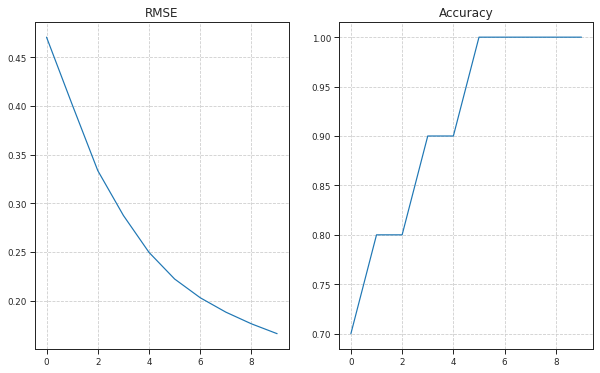

In [52]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(rmse)
plt.title('RMSE', fontsize=12)
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.title('Accuracy', fontsize=12)
plt.grid(linestyle = '--')

plt.show()

In [21]:
print('b\N{SUBSCRIPT ZERO}:', b0)
print('b\N{SUBSCRIPT ONE}:', b1)
print('b\N{SUBSCRIPT TWO}:', b2)

b₀: -0.4066054639903037
b₁: 0.8525733163581036
b₂: -1.1047462590413233


## Using Scikit Learn<a id='sck'></a>

First we'll calcuate the bias and the weights using default `lbfgs` function and than we'll use `SGDClassifier` library to solve the same problem and compare the biases weights.

In [30]:
from sklearn.linear_model import LogisticRegression

In [41]:
x = df.drop('y', axis=1)
y = df['y']

log_reg = LogisticRegression(max_iter=100) # Using defult lbfgs functions
log_reg.fit(x, y)

LogisticRegression()

In [32]:
print('b0: ', log_reg.intercept_[0])
print('b1: ', log_reg.coef_[0,0])
print('b2: ', log_reg.coef_[0,1])

b0:  -4.551633643506446
b1:  1.1838341521004292
b2:  -0.3580350205742518


In [39]:
# Predict
y_hat = log_reg.predict(x)
# Check the accuracy score of the training
score = log_reg.score(x, y)
print('Accuracy Score: ', score)

Accuracy Score:  1.0


In [34]:
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_hat)

# Format for easier understanding (not needed later on)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,0,5


In [36]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [53]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(max_iter=100) # Using SGDClassifier library
model.fit(x, y)
print('b0: ', model.intercept_[0])
print('b1: ', model.coef_[0,0])
print('b2: ', model.coef_[0,1])

b0:  -9.970049910169669
b1:  25.869786286248825
b2:  -37.44767418147798


In [54]:
y_hat = model.predict(x)
score = model.score(x, y)
print('Accuracy Score: ', score)

Accuracy Score:  1.0


In [55]:
cm = metrics.confusion_matrix(y, y_hat)

# Format for easier understanding (not needed later on)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5,0
Actual 1,0,5


## Real Life Data<a id='realdata'></a> 

We'll use [Hotel Reservations](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) dataset from Kaggle to demonstrate the performance and implementation of Logistic Regression of `sklearn`. The dataset has more than 10 features and 1 label which contains only binary values which indicate if the booking was canceled or not. Our aim will be to predict this label with high accuracy.

### Data Preparation

Since logistic regression is a linear model, we have the similar data preparation process as we have in Liner Regression. Those are:

1. The output has to have **binary variable**
2. Remove Noise
3. Inputs should have **Gaussian Distribution**
4. Correlated inputs should be removed 



In [56]:
# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

In [57]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [87]:
df_real = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Logistic Regression/Data/Hotel Reservations.csv')
df_real.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#### Check if the label has binary values

In [60]:
df_real.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


It's confirmed that `booking_status` feature has only 2 value; `Canceled` and `Not_Canceled`. First we need to map them into binary values as 0 and 1. In this case `Not_Canceled` will be 1 and `Canceled` will be 0.

In [88]:
df_real.replace({'booking_status':{'Canceled':0, 'Not_Canceled':1}}, inplace=True)
df_real.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


⚠️ Apart from the datapreparation steps that are montioned above, we also need to wrangle with the data in a regular way such as removing or imputing `null` values, scaling the numeric values, handling categorical values etc.

In [89]:
# Removing features that are not useful for predicting the booking status
df_real.drop(['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1, inplace=True)
df_real.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
market_segment_type,36275,5,Online,23214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repeated_guest,36275.0,NaN,NaN,NaN,0.025637,0.158053,0.0,0.0,0.0,0.0,1.0


In [66]:
df_real.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [67]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   market_segment_type                   36275 non-null  object 
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

#### Removing the Noise from the Dataset

In [71]:
df_real['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [90]:
nr_adults = [1, 2, 3]
df_real = df_real[df_real['no_of_adults'].isin(nr_adults)]
df_real['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
Name: no_of_adults, dtype: int64

In [91]:
df_real['no_of_children'].value_counts()

0     33561
1      1617
2       925
3        14
9         2
10        1
Name: no_of_children, dtype: int64

In [92]:
nr_childeren = [0, 1, 2]
df_real = df_real[df_real['no_of_children'].isin(nr_childeren)]
df_real['no_of_children'].value_counts()

0    33561
1     1617
2      925
Name: no_of_children, dtype: int64

In [82]:
df_real['no_of_weekend_nights'].value_counts()

0    16793
1     9959
2     9015
3      152
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [93]:
nr_weekend = [0, 1, 2]
df_real = df_real[df_real['no_of_weekend_nights'].isin(nr_weekend)]
df_real['no_of_weekend_nights'].value_counts()

0    16793
1     9959
2     9015
Name: no_of_weekend_nights, dtype: int64

In [84]:
df_real['no_of_week_nights'].value_counts()

2     11397
1      9442
3      7790
4      2978
0      2379
5      1536
6       126
7        63
8        38
9        13
10        5
Name: no_of_week_nights, dtype: int64

In [94]:
nr_weekdays = [0, 1, 2, 3, 4, 5]
df_real = df_real[df_real['no_of_week_nights'].isin(nr_weekdays)]
df_real['no_of_week_nights'].value_counts()

2    11397
1     9442
3     7790
4     2978
0     2379
5     1536
Name: no_of_week_nights, dtype: int64

In [95]:
df_real['required_car_parking_space'].value_counts()

0    34406
1     1116
Name: required_car_parking_space, dtype: int64

<AxesSubplot:>

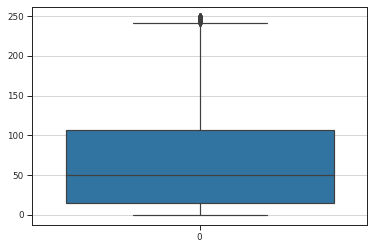

In [101]:
sb.boxplot(data=df_real['lead_time'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lead_time'>

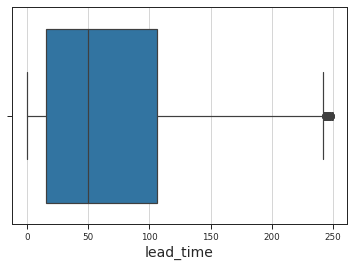

In [100]:
df_real = df_real[df_real['lead_time'] < 250]
sb.boxplot(data=df_real['lead_time'])

In [102]:
df_real['no_of_previous_cancellations'].value_counts()

0     32644
1       192
2        46
3        43
11       25
5        10
4         9
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [104]:
# Since huge majority of the no_of_previous_cancellations feature is 0 then it's better to remove this columns as it'll represent only one value
df_real.drop('no_of_previous_cancellations', axis=1, inplace=True)

In [105]:
df_real['no_of_previous_bookings_not_canceled'].value_counts()

0     32056
1       206
2       100
3        66
4        47
5        38
6        23
7        16
8        15
9        14
10       11
11        9
12        7
14        5
13        3
25        3
21        2
16        2
19        2
18        2
22        2
17        2
15        2
20        2
31        1
32        1
26        1
27        1
23        1
28        1
24        1
29        1
30        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [106]:
# Since huge majority of the no_of_previous_bookings_not_canceled feature is 0 then it's better to remove this columns as it'll represent only one value
df_real.drop('no_of_previous_bookings_not_canceled', axis=1, inplace=True)

<AxesSubplot:>

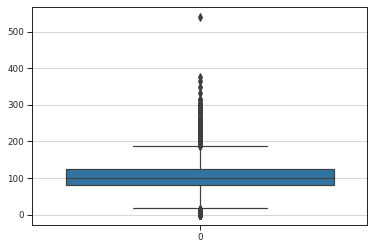

In [107]:
sb.boxplot(data=df_real['avg_price_per_room'])

<AxesSubplot:>

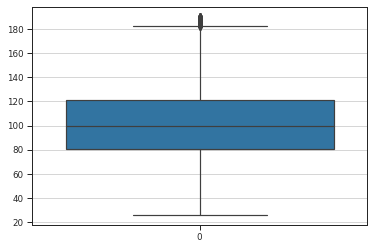

In [109]:
df_real = df_real[(df_real['avg_price_per_room'] > 25) & (df_real['avg_price_per_room'] < 190)]
sb.boxplot(data=df_real['avg_price_per_room'])

In [110]:
df_real['no_of_special_requests'].value_counts()

0    16811
1    10029
2     3908
3      584
4       57
5        6
Name: no_of_special_requests, dtype: int64

In [111]:
nr_requests = [0, 1, 2]
df_real = df_real[df_real['no_of_special_requests'].isin(nr_requests)]
df_real['no_of_special_requests'].value_counts()

0    16811
1    10029
2     3908
Name: no_of_special_requests, dtype: int64

In [113]:
df_real.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
no_of_adults,30748.0,NaN,NaN,NaN,1.850885,0.508851,1.0,2.0,2.0,2.0,3.0
no_of_children,30748.0,NaN,NaN,NaN,0.077306,0.320951,0.0,0.0,0.0,0.0,2.0
no_of_weekend_nights,30748.0,NaN,NaN,NaN,0.792734,0.82344,0.0,0.0,1.0,2.0,2.0
no_of_week_nights,30748.0,NaN,NaN,NaN,2.120593,1.214938,0.0,1.0,2.0,3.0,5.0
type_of_meal_plan,30748,3,Meal Plan 1,23775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,30748.0,NaN,NaN,NaN,0.031091,0.173568,0.0,0.0,0.0,0.0,1.0
room_type_reserved,30748,7,Room_Type 1,24088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,30748.0,NaN,NaN,NaN,70.480421,63.434182,0.0,16.0,53.0,109.0,249.0
market_segment_type,30748,5,Online,20251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repeated_guest,30748.0,NaN,NaN,NaN,0.015871,0.124978,0.0,0.0,0.0,0.0,1.0


In [114]:
df_real['booking_status'].value_counts()

1    21520
0     9228
Name: booking_status, dtype: int64

In [122]:
df_real['booking_status'] = df_real['booking_status'].astype('category')

In [125]:
df_real.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,30748.0,1.850885,0.508851,1.00,2.0,2.00,2.0,3.0
no_of_children,30748.0,0.077306,0.320951,0.00,0.0,0.00,0.0,2.0
no_of_weekend_nights,30748.0,0.792734,0.823440,0.00,0.0,1.00,2.0,2.0
no_of_week_nights,30748.0,2.120593,1.214938,0.00,1.0,2.00,3.0,5.0
required_car_parking_space,30748.0,0.031091,0.173568,0.00,0.0,0.00,0.0,1.0
lead_time,30748.0,70.480421,63.434182,0.00,16.0,53.00,109.0,249.0
repeated_guest,30748.0,0.015871,0.124978,0.00,0.0,0.00,0.0,1.0
avg_price_per_room,30748.0,103.525899,28.711268,26.35,81.0,99.95,121.0,189.9
no_of_special_requests,30748.0,0.580363,0.705516,0.00,0.0,0.00,1.0,2.0


In [116]:
from imblearn.under_sampling import RandomUnderSampler

In [124]:
rus = RandomUnderSampler(random_state=101)
x = df_real.drop('booking_status', axis=1)
y = df_real['booking_status']

x_res, y_res = rus.fit(x, y)

TypeError: ignored